In [1]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import math
import argparse
import pandas as pd
import csv
import numpy as np

In [2]:
import csv

districts = dict()
subdistricts = dict()
unique_subdistricts = set()

with open("India_pov_pop_w_district.csv", "r") as original_file:
    villagereader = csv.reader(original_file)
    count = 0
    for row in villagereader:
        count += 1
        if count == 1:
            continue
        districts[row[2]] = row[-2]
        subdistricts[row[2]] = row[-1]
        unique_subdistricts.add(row[-1])

print(len(districts))
print(len(subdistricts))
print(len(unique_subdistricts))

567976
567976
5740


In [3]:
true_vals_by_subdistrict = dict()
pred_vals_by_subdistrict = dict()

true_vals = []
pred_vals = []

baselines = ["Landscan_data_3_19.csv", "NL_data_3_19.csv"]
baseline = baselines[0]

with open(baseline, "r") as landscan_file:
    landscanreader = csv.reader(landscan_file)
    count = 0
    for row in landscanreader:
        count += 1
        if count == 1:
            continue
        if baseline == "Landscan_data_3_19.csv":
            vid = str(row[2])
            true_val = np.log2(float(row[0]))
            pred_val = np.log2(float(row[1]))
        elif baseline == "NL_data_3_19.csv":
            vid = str(row[2])
            true_val = float(row[1]) # already log 2
            pred_val = float(row[0])
        
        true_vals.append(true_val)
        pred_vals.append(pred_val)
        
        if count < 5:
            print(vid, row[0], row[1], true_val, pred_val)
        if vid in subdistricts:
            subdistrict = subdistricts[vid]
            if subdistrict not in true_vals_by_subdistrict:
                true_vals_by_subdistrict[subdistrict] = 0.0
            if subdistrict not in pred_vals_by_subdistrict:
                pred_vals_by_subdistrict[subdistrict] = 0.0

            true_vals_by_subdistrict[subdistrict] += true_val
            pred_vals_by_subdistrict[subdistrict] += pred_val

442056 135.57493021539628 321.02588478280745 7.08294661753 8.32654581841
442057 28.845416988083052 185.65405156415397 4.85027021397 7.53647298952
442059 49.95489107036116 382.0575747005374 5.64255403372 8.57764625337


100
100
rmse: 164.119365479
mae: 119.732227839


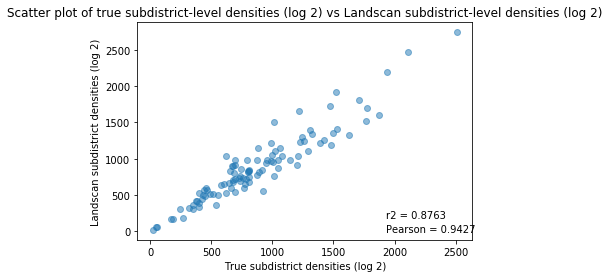

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from scipy.stats import pearsonr

true_subdistrict_vals = []
pred_subdistrict_vals = []
for subdistrict, val in true_vals_by_subdistrict.items():
    true_subdistrict_vals.append(val)
    pred_subdistrict_vals.append(pred_vals_by_subdistrict[subdistrict])

print(len(true_subdistrict_vals))
print(len(pred_subdistrict_vals))

mse = mean_squared_error(true_subdistrict_vals, pred_subdistrict_vals)
print("rmse:", np.sqrt(mse))

mse = mean_absolute_error(true_subdistrict_vals, pred_subdistrict_vals)
print("mae:", mse)

if baseline == "Landscan_data_3_19.csv":
    title = "Scatter plot of true subdistrict-level densities (log 2) vs Landscan subdistrict-level densities (log 2)"
    ylabel = "Landscan subdistrict densities (log 2)"
elif baseline == "NL_data_3_19.csv":
    title = "Scatter plot of true subdistrict-level densities (log 2) vs nightlights subdistrict-level densities (log 2)"
    ylabel = "Nightlights subdistrict densities (log 2)"
    
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel("True subdistrict densities (log 2)")
r2 = r2_score(true_subdistrict_vals, pred_subdistrict_vals)
p = pearsonr(true_subdistrict_vals, pred_subdistrict_vals)[0]
plt.figtext(0.7, 0.2, "r2 = %.4f" % r2)
plt.figtext(0.7, 0.15, "Pearson = %.4f" % p)
plt.scatter(true_subdistrict_vals, pred_subdistrict_vals, alpha=0.5)
plt.show()

real: 7.08294661753
pred: 8.32654581841


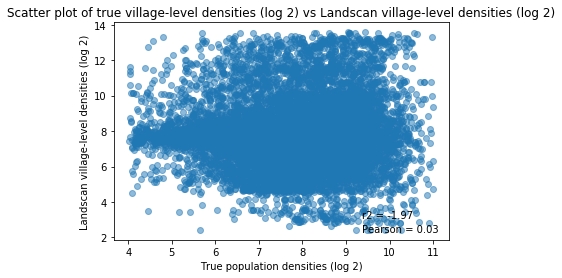

rmse: 2.13892536447
mae: 1.63076362111


In [5]:
print("real:", true_vals[0])
print("pred:", pred_vals[0])

if baseline == "Landscan_data_3_19.csv":
    title = "Scatter plot of true village-level densities (log 2) vs Landscan village-level densities (log 2)"
    ylabel = "Landscan village-level densities (log 2)"
elif baseline == "NL_data_3_19.csv":
    title = "Scatter plot of true village-level densities (log 2) vs nightlights village-level densities (log 2)"
    ylabel = "Nightlights village-level densities (log 2)"

plt.title(title)
plt.ylabel(ylabel)
plt.xlabel("True population densities (log 2)")
r2 = r2_score(true_vals, pred_vals)
p = pearsonr(true_vals, pred_vals)[0]
plt.figtext(0.7, 0.2, "r2 = %.2f" % r2)
plt.figtext(0.7, 0.15, "Pearson = %.2f" % p)
plt.scatter(true_vals, pred_vals, alpha=0.5)
plt.show()

mse = mean_squared_error(true_vals, pred_vals)
print("rmse:", np.sqrt(mse))

mse = mean_absolute_error(true_vals, pred_vals)
print("mae:", mse)